In [66]:
import pandas as pd
from textblob import TextBlob

# load data 
data = pd.read_excel("cleaned_data.xlsx")

# display first few rows of the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1342 entries, 0 to 1341
Data columns (total 10 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   Responder ID                                           1342 non-null   int64 
 1   Terms                                                  1342 non-null   object
 2   Coll                                                   1342 non-null   object
 3   Major                                                  1342 non-null   object
 4   Conc                                                   1342 non-null   object
 5   Class BOT                                              1342 non-null   object
 6   Citizenship                                            1342 non-null   object
 7   Coop #                                                 1342 non-null   object
 8   Goal Reflection                                        134

In [74]:
from textblob import TextBlob

# define function to classify sentiment
def classify_sentiment(text):
    # use TextBlob to determine sentiment
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity
    # classify sentiment: positive (1), neutral (2), negative (0)
    if polarity > 0.07:
        return 1  # positive
    elif polarity < -0.07:
        return 0  # negative
    else:
        return 2  # neutral

# apply function classify_sentiment to 'Goal Reflection' column
data['Sentiment'] = data['Goal Reflection'].apply(classify_sentiment)
data.head()


,Responder ID,Terms,Coll,Major,Conc,Class BOT,Citizenship,Coop #,Goal Reflection,What are the most important skills you used on co-op?,Sentiment
0,3572,Fall/Winter,B,FIN,4COP,SR,International,First/Only,this coop really helped me gain leadership qua...,communication,1
1,3574,Fall/Winter,B,LGST,4COP,SR,Domestic,First/Only,i really wanted to build my network and begin ...,"Organization for one, especially being part of...",1
2,3581,Fall/Winter,B,ACCT,5COP,SR,Domestic,Second,although i do not see myself working in financ...,I use excel every day at my co-op position. My...,1
3,3583,Fall/Winter,B,FIN,5COP,JR,Domestic,Second,at my previous coop i was told i need to speak...,I would say communication skills. While workin...,1
4,3584,Fall/Winter,B,INT2,5COP,SR,Domestic,First,i never expected to have a job in forensic acc...,Interpersonal communication - while it is a so...,1


In [75]:
data['Sentiment'].value_counts() # counts unique values in 'Sentiment'

Sentiment
1    1149
2     178
0      15
Name: count, dtype: int64

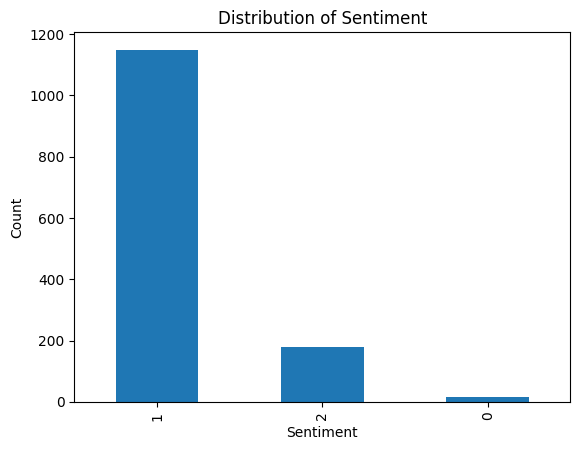

In [76]:
import matplotlib.pyplot as plt

# plot distribution of 'Sentiment'
data['Sentiment'].value_counts().plot(kind='bar')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiment')
plt.show()

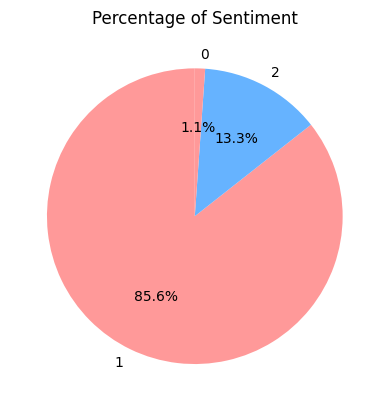

In [77]:
# calculate percentage of each sentiment
sentiment_counts = data['Sentiment'].value_counts(normalize=True) * 100

# plotting a pie chart for a visually denser representation of the sentiment
sentiment_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
plt.ylabel('')
plt.title('Percentage of Sentiment')
plt.show()

In [78]:
from collections import Counter       # to count the no. of students with each skill
import matplotlib.pyplot as plt

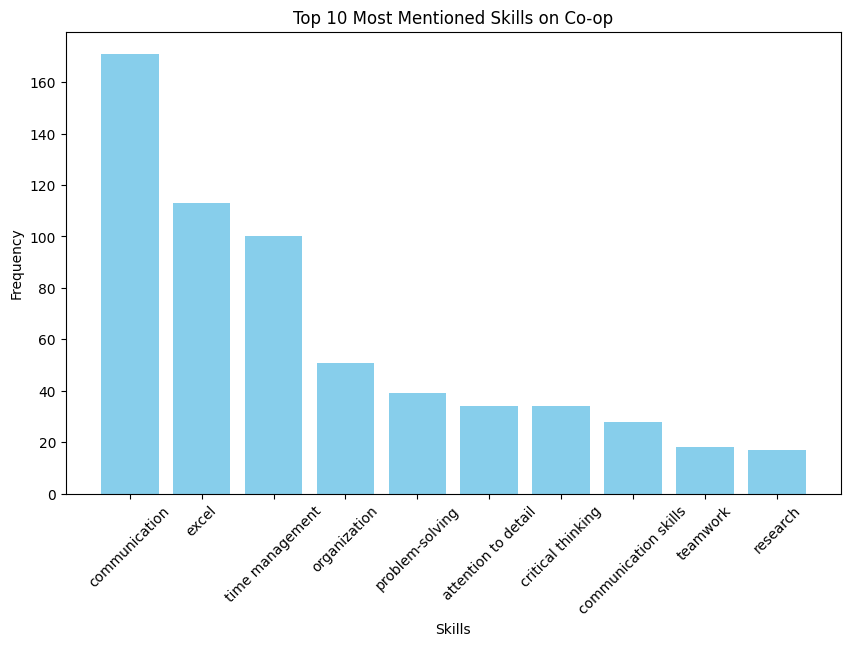

In [79]:
# convert all entries to strings
skills_data = data['What are the most important skills you used on co-op?'].astype(str)

# function to normalise skill names
def normalize_skill(skill):
    skill = skill.replace('-', ' ')
    skill = skill.replace('problem solving', 'problem-solving')
    return skill.strip().lower() # solves case sensitivity issue

# splitting and normalising the skills data into a list of skills
skills_list = [normalize_skill(skill) for skill_line in skills_data for skill in skill_line.split(',')]

# count occurrences of each skill
skill_counts = Counter(skills_list)

# get the top 10 most common skills for visualization
top_skills = skill_counts.most_common(10)

# prepare data for plotting
skills, counts = zip(*top_skills)

# create bar chart for the most mentioned skills
plt.figure(figsize=(10, 6))
plt.bar(skills, counts, color='skyblue')
plt.xlabel('Skills')
plt.ylabel('Frequency')
plt.title('Top 10 Most Mentioned Skills on Co-op')
plt.xticks(rotation=45)
plt.show()

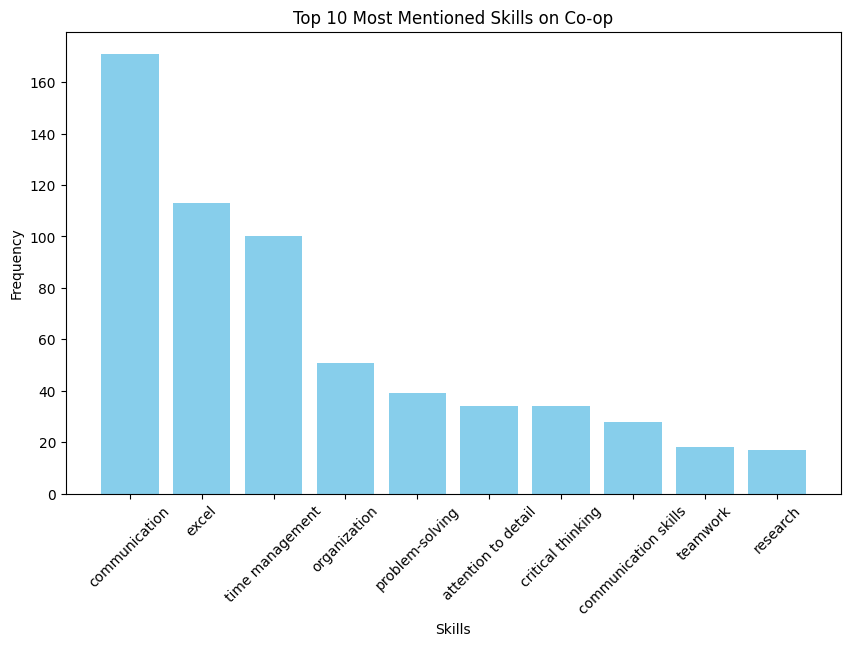

In [52]:
# create bar chart for the most mentioned skills
plt.figure(figsize=(10, 6))
plt.bar(skills, counts, color='skyblue')
plt.xlabel('Skills')
plt.ylabel('Frequency')
plt.title('Top 10 Most Mentioned Skills on Co-op')
plt.xticks(rotation=45)
plt.show()

In [54]:
# adjusted normalisation function to handle overlapping skills
def normalize_skill(skill):
    skill = skill.lower().strip().replace('-', ' ')
    # combine similar skills
    if 'communication' in skill:
        return 'communication'
    return skill

# Define a function to create binary indicators for each skill
def skill_indicator(row, skill):
    # extracting and normalising skills from the row
    skills_in_row = [normalize_skill(s) for s in str(row['What are the most important skills you used on co-op?']).split(',')]
    # check for skill presence, considering partial matches if necessary
    return 1 if any(skill in s for s in skills_in_row) else 0


In [55]:
# ensure to update the list of top skills after normalization
skills_data = data['What are the most important skills you used on co-op?'].astype(str)
skills_list = [normalize_skill(skill) for skill_line in skills_data for skill in skill_line.split(',')]
skill_counts = Counter(skills_list)
top_skills = [skill[0] for skill in skill_counts.most_common(10)]

# add a binary column for each top skill
for skill in top_skills:
    data[skill + '_mentioned'] = data.apply(lambda row: skill_indicator(row, skill), axis=1)


In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1342 entries, 0 to 1341
Data columns (total 23 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   Responder ID                                           1342 non-null   int64 
 1   Terms                                                  1342 non-null   object
 2   Coll                                                   1342 non-null   object
 3   Major                                                  1342 non-null   object
 4   Conc                                                   1342 non-null   object
 5   Class BOT                                              1342 non-null   object
 6   Citizenship                                            1342 non-null   object
 7   Coop #                                                 1342 non-null   object
 8   Goal Reflection                                        134

In [ ]:
# merge columns 'communication_mentioned' and 'communication skills_mentioned'
data['communication_mentioned'] = data['communication_mentioned'] + data['communication skills_mentioned']

# drop the original columns if no longer needed
data.drop(columns=['communication skills_mentioned'], inplace=True)

KeyError: 'communication skills_mentioned'

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1342 entries, 0 to 1341
Data columns (total 22 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   Responder ID                                           1342 non-null   int64 
 1   Terms                                                  1342 non-null   object
 2   Coll                                                   1342 non-null   object
 3   Major                                                  1342 non-null   object
 4   Conc                                                   1342 non-null   object
 5   Class BOT                                              1342 non-null   object
 6   Citizenship                                            1342 non-null   object
 7   Coop #                                                 1342 non-null   object
 8   Goal Reflection                                        134

In [62]:
# save the dataframe with binary skill indicators
data.to_excel("KPI_3_full.xlsx", index=False)